### Ordinary least Sequare

In [3]:
from sklearn.linear_model import LinearRegression

In [5]:
regression = LinearRegression()

In [6]:
regression.fit([[0,0], [1, 1], [2, 2]], [0, 1, 2])

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [7]:
regression.coef_

array([0.5, 0.5])

In [8]:
regression.intercept_

2.220446049250313e-16

### Ridge Regression

In [9]:
from sklearn.linear_model import Ridge

In [10]:
ridge_regression = Ridge()

In [12]:
ridge_regression.fit([[0, 0], [1, 1], [2,2]], [0, 1, 2])

Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

In [13]:
ridge_regression.coef_

array([0.4, 0.4])

### Ridge Classification

###  
<!DOCTYPE html>

<head>
    </head>
        <body>
    <p>The Ridge regressor has a classifier variant: <a href="https://scikit-learn.org/stable/modules/linear_model.html#ridge-regression-and-classification">RidgeClassifier</a>. This classifier first converts binary targets to {-1, 1} and then treats the problem as a <a href="https://www.investopedia.com/terms/r/regression.asp">Regression</a> task, optimizing the same objective as above. The predicted class corresponds to the sign of the regressor’s prediction. For multiclass classification, the problem is treated as multi-output regression, and the predicted class corresponds to the output with the highest value.

It might seem questionable to use a (penalized) Least Squares loss to fit a classification model instead of the more traditional<a href="https://www.investopedia.com/terms/l/logistics.asp"> Logistic</a> or hinge losses. However in practice all those models can lead to similar cross-validation scores in terms of accuracy or precision/recall, while the penalized least squares loss used by the RidgeClassifier allows for a very different choice of the numerical solvers with distinct computational performance profiles.The RidgeClassifier can be significantly faster than e.g. LogisticRegression with a high number of classes, because it is able to compute the projection matrix 
 only once.
        [Source :<a href="https://scikit-learn.org/stable/modules/linear_model.html#ordinary-least-squares">Scikit-Learn </a>]
       </p>
            </body>
</html>

In [15]:
from sklearn.linear_model import RidgeCV # Ridge cross-validation
import numpy as np

In [16]:
regression_cv = RidgeCV(alphas=np.logspace(-6, 6, 13))
regression_cv.fit([[0, 0], [1, 1], [2, 2]], [0, 1, 2])

RidgeCV(alphas=array([1.e-06, 1.e-05, 1.e-04, 1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01,
       1.e+02, 1.e+03, 1.e+04, 1.e+05, 1.e+06]),
        cv=None, fit_intercept=True, gcv_mode=None, normalize=False,
        scoring=None, store_cv_values=False)

In [17]:
regression_cv.coef_

array([0.49999988, 0.49999988])

In [18]:
regression_cv.intercept_

2.491287887096405e-07

### Please Click This title for mode descriftion <a href="https://scikit-learn.org/stable/modules/linear_model.html#lasso">Lasso</a>

In [19]:
from sklearn.linear_model import Lasso

In [22]:
linear_model_lasso = Lasso(alpha=0.1)

In [23]:
linear_model_lasso.fit([[0,0], [1, 1], [2, 2]], [0, 1, 2])

Lasso(alpha=0.1, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [24]:
linear_model_lasso.coef_

array([0.85, 0.  ])

In [25]:
linear_model_lasso.intercept_

0.15000000000000002

### Example of Lasso

In [41]:
print(__doc__)
import numpy as np
from sklearn.linear_model import Lasso
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt
from sklearn.linear_model import ElasticNet

Automatically created module for IPython interactive environment


In [61]:
# Create some random datasets using numpy for analysis and effect of the lasso Algorithm into datasets
np.random.seed(42)
n_samples = 50
n_featue  =50

x = np.random.randn(n_samples, n_featue)
idx = np.arange(n_featue)
coef = (-1)**idx *np.exp(-idx/10)
coef[10:] = 0
y = np.dot(x, coef)

y+=0.01 * np.random.normal(size = n_samples)

In [62]:
n_samples = x.shape[0]
x_train, y_train = x[:n_samples//2], y[:n_samples//2]
x_test = x[n_samples//2:]
y_test = y[n_samples//2:]

In [63]:
generator = Lasso(alpha=0.1)
y_predict_lasso = generator.fit(x_train, y_train).predict(x_test)
r2_score_lasso = r2_score(y_test, y_predict_lasso)
print(generator)
print('r squared value on test data : %f'%r2_score_lasso)

Lasso(alpha=0.1, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)
r squared value on test data : 0.954766


In [64]:
enet = ElasticNet(alpha = 0.1, l1_ratio=0.7)
y_predict_net = enet.fit(x_train, y_train).predict(x_test)
r_squared_net = r2_score(y_test, y_predict_net)
print(enet)
print('r squared value on test data using Elastic : %f'%r_squared_net)

ElasticNet(alpha=0.1, copy_X=True, fit_intercept=True, l1_ratio=0.7,
           max_iter=1000, normalize=False, positive=False, precompute=False,
           random_state=None, selection='cyclic', tol=0.0001, warm_start=False)
r squared value on test data using Elastic : 0.888351


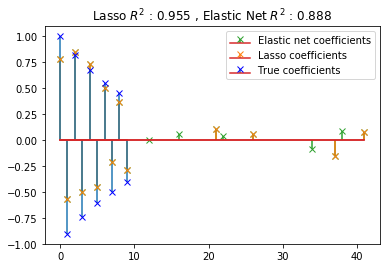

In [65]:
m, s, _ = plt.stem(np.where(enet.coef_)[0], enet.coef_[enet.coef_!=0],
                  markerfmt = 'x', label = 'Elastic net coefficients',
                  use_line_collection=True)
plt.setp([m, s], color= "#2ca02c")

m, s, _ = plt.stem(np.where(generator.coef_)[0], enet.coef_[generator.coef_!=0],
                  markerfmt = 'x', label = 'Lasso coefficients',
                  use_line_collection=True)
plt.setp([m,s], color = '#ff7f0e')

m, s, _ = plt.stem(np.where(coef)[0], coef[coef!=0],
                  markerfmt = 'bx', label = 'True coefficients',
                  use_line_collection=True)
plt.legend(loc = 'best')

plt.title('Lasso $R^2$ : %.3f , Elastic Net $R^2$ : %.3f'%(r2_score_lasso, r_squared_net))
plt.show()